<a href="https://colab.research.google.com/github/Thorne-Musau/np/blob/main/Array_sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section deals with algorithms related to to sorting numpy array values.
A simple selection sort repeatedly finds the minimum value from a list, and makes swaps until the list is sorted

This is done in just a few lines of python code.


In [1]:
import numpy as np
# selection sort function
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [2]:
x = np.array([2,1,4,5,7])
selection_sort(x)

array([1, 2, 4, 5, 7])

For bogosort algorithm;

In [3]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x
bogosort(x)

array([1, 2, 4, 5, 7])

For selection sort, In terms of the "big-O" notation often used to characterize these algorithms (see Big-O Notation), selection sort averages O[N2]
: if you double the number of items in the list, the execution time will go up by about a factor of four.

The Bogo sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted. With an average scaling of O[N×N!]
, (that's N times N factorial) this should–quite obviously–never be used for any real computation.

# Sorting in Numpy.
The use of np.sort and np.argsort is implored

In [4]:
np.sort(x)

array([1, 2, 4, 5, 7])

In [5]:
#or
x.sort()
print(x)

[1 2 4 5 7]


In [6]:
np.argsort(x)

array([0, 1, 2, 3, 4])

## Sorting along rows
Use of the axis argument

In [7]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [9]:
np.sort(X, axis=0) # Sorts each column of x

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [10]:
np.sort(X, axis=1) # sorts each row of x

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorting
Done using the np.partition function
np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [11]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [13]:
np.partition(X, 2, axis=1)
# Can also be done along an arbitrary axis of a multidimestional array

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example by use of the K-nearest neighbours

Start by craeting a random set of 10 points in a set

In [14]:
X = rand.rand(10, 2)

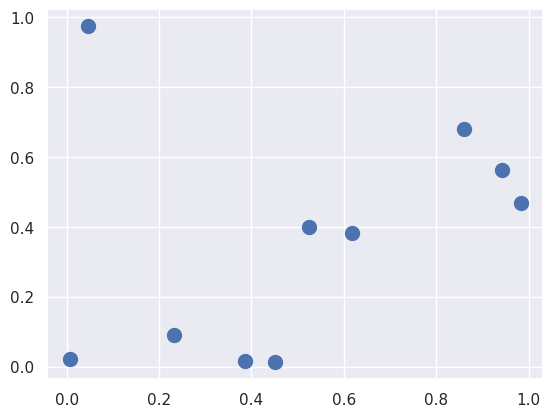

In [16]:
# Visualizing how the points look
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

 We compute the distance between each pair of points. Recall that the squared-distance between two points is the sum of the squared differences in each dimension

In [17]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [18]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [19]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [20]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [21]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [23]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

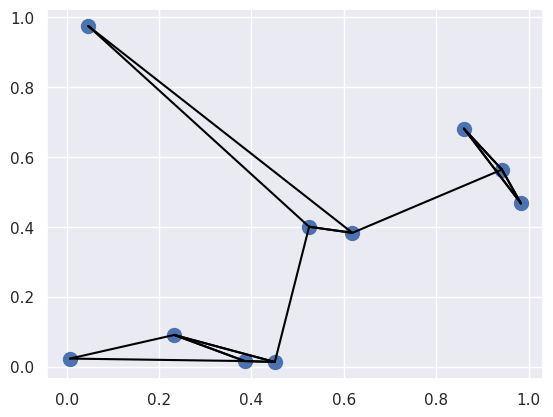

In [24]:
# Visualize the network of neighbours:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')